In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import sys
import gillespy2
from gillespy2 import TauHybridSolver

In [23]:
class Example(gillespy2.Model):
    """                                                                                                                                                                                                                              
    This is a simple example for mass-action degradation of species S.  We will add two events
    to demonstrate the usage of events.  The first event will assign the value '0' to our species
    once time passes 20, and the second event will be triggered once time crosses 30, assigning
    a value of "100" to our species and changing the value of our degradation rate parameter
    "k1" from .01 to .1, causing the species to decay more quickly.
    """                                                                                                                                                                                                                              
                                                                                                                                                                                                                                     
    def __init__(self, parameter_values=None):                                                                                                                                                                                       
        
        # Initialize the model.                                                                                                                                                                                                      
        gillespy2.Model.__init__(self, name="Example")

        # Species                                                                                                                                                                                                                    
        V = gillespy2.Species(name='VI', initial_value=100, mode='discrete')
        self.add_species([V])
        
        # Parameters                                                                                                                                                                                                                 
        k1 = gillespy2.Parameter(name='k', expression=0.031)
        r1 = gillespy2.Parameter(name='r', expression=0.0000000001)
        self.add_parameter([k1,r1])    
        
        # Events
        et = gillespy2.EventTrigger(expression='t<20')
        #ea = gillespy2.EventAssignment(variable=V, expression='0')
        ea = gillespy2.EventAssignment(variable=k1, expression='0')
        #ea1 = gillespy2.EventAssignment(variable=r1, expression='0.00001')
        e = gillespy2.Event(name='event1', trigger=et, assignments=ea)
        
        et2 = gillespy2.EventTrigger(expression='t>=20', persistent=True)
        #ea2 = gillespy2.EventAssignment(variable=V, expression='100')
        ea3 = gillespy2.EventAssignment(variable=k1, expression='(0.872/-0.258)*(exp(-0.258*(t-19))-1)*0.031')
        #ea2 = gillespy2.EventAssignment(variable=r1, expression='0.00001')
        #e2 = gillespy2.Event(name='event2', trigger=et2, assignments=[ea2, ea3])
        e2 = gillespy2.Event(name='event2', trigger=et2, assignments=ea3)
        self.add_event([e, e2])
        
        #Reactions
        rea1 = gillespy2.Reaction(name='R1', reactants={V:1}, products={}, rate=k1) #Multiple reactions
        rea2 = gillespy2.Reaction(name='R2', reactants={}, products={V:1}, rate=r1) #Multiple reactions
        self.add_reaction([rea1,rea2])

        self.timespan(np.arange(0, 38, 0.02))

In [6]:
model = Example()
results = model.run(number_of_trajectories=250,solver=TauHybridSolver)

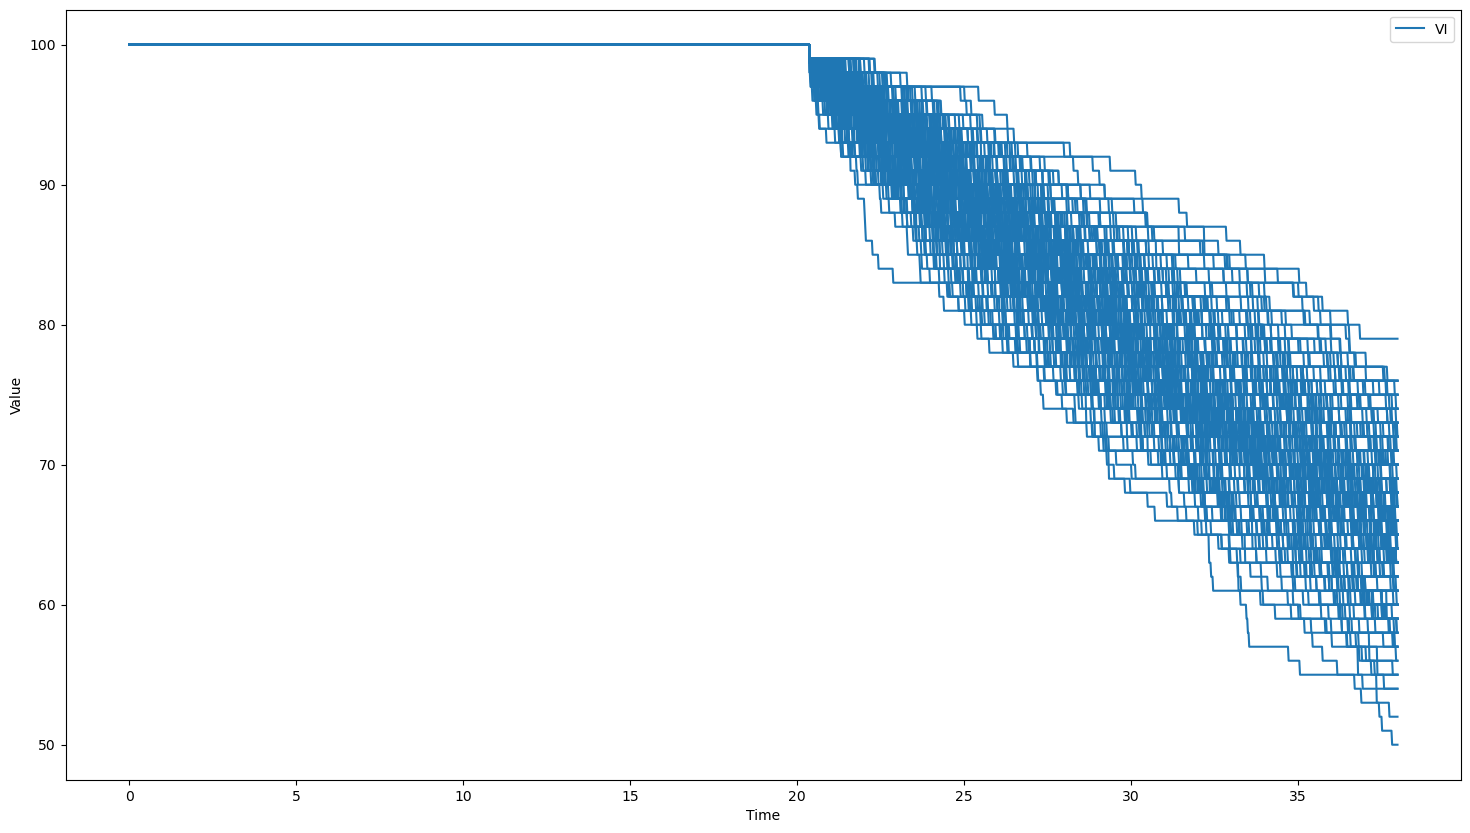

In [7]:
results.plot()

          Time  Background  Tcells  Parasite ID  Intensity     Time_1  \
0     240.0000        51.2       5            1      170.8   4.000000   
1     241.1589        54.0       5            1      198.3   4.019315   
2     242.3178        53.9       5            1      192.4   4.038630   
3     243.4767        51.9       5            1      192.5   4.057945   
4     244.6356        54.3       5            1      193.7   4.077260   
...        ...         ...     ...          ...        ...        ...   
2114  639.8325        69.7       0           32      151.3  10.663875   
2115  645.2825        70.6       0           32      154.9  10.754708   
2116  650.7325        68.4       0           32      145.0  10.845542   
2117  656.1825        67.7       0           32      154.7  10.936375   
2118  661.6325        70.5       0           32      152.3  11.027208   

      Intensity_scale  Background_scale  VI_Index  
0               170.8              51.2  0.523218  
1               198

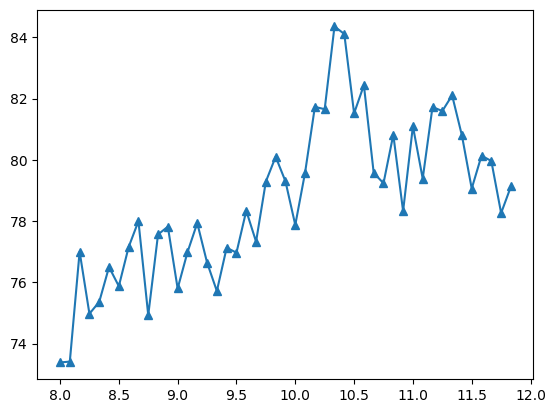

In [8]:
import pandas as pd
import numpy as np
import os
os.chdir("/Users/soumenbera/Documents/Killing_Tcells/stochastic_model")
data = pd.read_excel('Data_killing_23July2018-curated-final.xlsx') #data path
control_data = pd.read_excel('control-data.xlsx')
df = pd.DataFrame(data,columns = ['Time','Background','Tcells','Parasite ID','Intensity'])
#df["Intensity_scale"] = np.log10(df.Intensity)
#df["Intensity_scale1"] = df.Intensity_scale.fillna(df.Intensity_scale.mean())
df["Time_1"] = df.Time/60.0
df["Intensity_scale"] = df.Intensity.fillna(df.Intensity.mean())
df["Background_scale"] = df.Background.fillna(df.Background.mean())
df["VI_Index"] = np.log10(df["Intensity_scale"]/df["Background_scale"])
#df.loc[(df.Intensity_scale1>np.mean(df.Intensity_scale1))|((df.Intensity_scale1<=np.mean(df.Intensity_scale1)))]
from sklearn import preprocessing
#df["time_scaled"] = preprocessing.scale(df.Time.values)
#print (df)
#print (df['Time from T transfer (min)'], df['Parasite ID']==1)
#df["Intensity_scale2"]=df.Intensity_scale>np.mean(df.Intensity_scale1)
print(df)
import sys
print(sys.path)

###############
import matplotlib.pyplot as plt
j = 1
df2=[]
for i in range(32):
    df1=(df[df['Parasite ID']==j]) # separate the data according to parasite id 
    df2.append(df1)
    j=j+1
##############
plt.plot(df2[11]['Time_1'], df2[11]['VI_Index']*100,'-^')

In [24]:
x = df2[11]['Time_1']
y = df2[11]['VI_Index']*100
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x,y)

In [25]:
slope

1.6410023768946609

In [11]:
from numpy import random
t = np.arange(20,38,0.02)

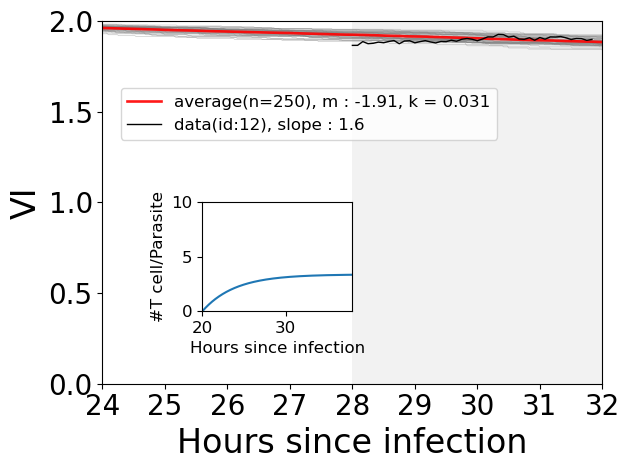

In [18]:
from matplotlib import gridspec
import seaborn as sns
gs = gridspec.GridSpec(1,1)
ax0 = plt.subplot(gs[0,0])
time = np.array(results[0]['time'])
time_traj = np.array([results[i]['time'] for i in range(50)]).T
s_trajectories = np.array([results[i]['VI'] for i in range(50)]).T
ax0.plot(time,np.log10(s_trajectories), 'gray',linewidth = 0.5,alpha=0.4)
ax0.plot(time,np.log10(s_trajectories.mean(1)),'r-',linewidth = 1.9, alpha = 0.9,label='average(n=250), m : -1.91, k = 0.031')

ax0.plot(df2[11]['Time_1']+20, np.log10(df2[11]['VI_Index']*100),'k-',linewidth = 1, alpha=1,
         label = 'data(id:12), slope : 1.6')

ax0.legend(fontsize = 12,bbox_to_anchor=(0.02,0.65,0.5,0.5))
ax0.set_xlabel('Hours since infection', fontsize=24)
ax0.set_ylabel('VI',fontsize=24)
ax0.set_ylim(0,2)
ax0.set_xlim(24,32)

ax0.axhline(y=20, color='k', linestyle='--', alpha=0.4, linewidth=0.5)
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(20)
#ax0.text(31,90,'T-cell(average)=3.19',style='italic',fontsize=16)
#ax0.text(30,90,'k=0.037/h',style='italic',fontsize=14)
ax0.axvspan(28,32, alpha=0.10, color='gray', lw=0)
#ax0.axvspan(28,33, alpha=0.10, color='gray', lw=0)
#ax0.set_yscale('log')


# second axis
axin = ax0.inset_axes([0.2,0.20,0.3,0.3])
axin.plot(t,(0.872/-0.258)*(np.exp(-0.258*(t-20))-1), label='T cell')
axin.set_xlim(20,38)
axin.set_ylim(0,10)
#axin.legend(fontsize = 12,loc='upper left')
axin.set_xlabel('Hours since infection', fontsize=12)
axin.set_ylabel('#T cell/Parasite',fontsize=12)
for label in (axin.get_xticklabels() + axin.get_yticklabels()):
    label.set_fontsize(12)

#yticks = ['0','1','2']
#y = [1,10,100]
ax0.set_yticks([0,0.5,1,1.5,2])
#ax0.set_yticks(y,yticks)
plt.tight_layout()
plt.savefig('stochastic-simu-test-12_1.png', format='png',bbox_inches='tight', dpi=300)
plt.show()

In [15]:
from scipy.stats import linregress
Y = s_trajectories.mean(1)[1400:1600]
X = time[1400:1600]
slope, intercept, r_value, p_value, std_err = linregress(X,Y)

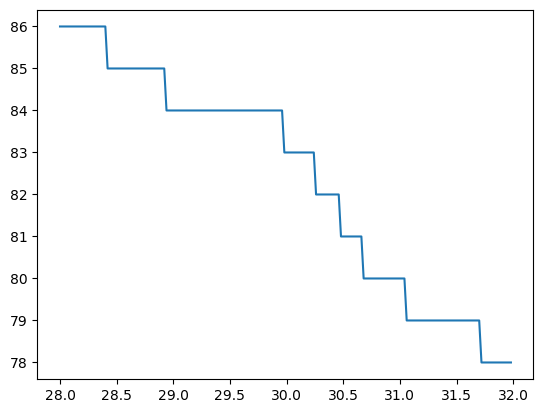

In [16]:
#plt.plot(time[1400:1600],s_trajectories[1400:1600])
#s_trajectories[1400:1600]
#time[1400:1600]
Slope=[]
Intercept = []
R = []
P = []
plt.plot(time[1400:1600],s_trajectories[1400:1600][:,49])
for i in range(50):
    X = time[1400:1600]
    Y = s_trajectories[1400:1600][:,i]
    slope, intercept, r_value, p_value, std_err = linregress(X,Y)
    Slope.append(slope)
    Intercept.append(intercept)
    R.append(r_value)
    P.append(p_value)

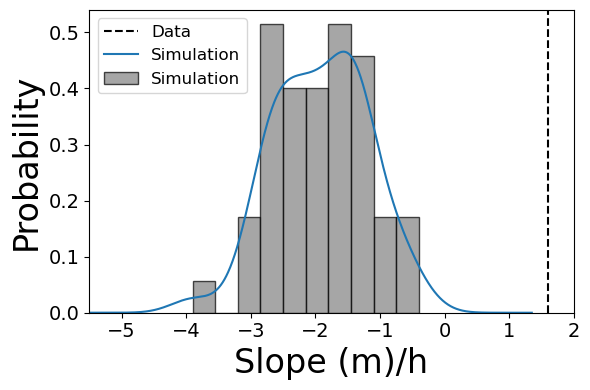

In [20]:
fig,ax = plt.subplots(figsize = (6,4))
x = np.round(Slope,1)
y = pd.DataFrame(x,columns = ['Simulation'])
#y.rename(columns={"0": "Simulation"})

y.plot.hist(density = True, ax=ax,legend = False,color = 'grey', alpha = 0.7,bins = 10,
            histtype = 'bar', ec = 'black')
ax.set_xlabel('Slope (m)/h', fontsize=24)

#ax.set_ylim(1,n.max()+0.5)
ax.set_xlim(-5.5,2)
ax.axvline(1.6,color='k', linestyle='--', alpha=1, linewidth=1.5, label='Data')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
#ax.legend(fontsize = 12,loc='center right')
y.plot.kde(ax=ax,legend = False)
ax.set_ylabel('Probability',fontsize=24)
ax.legend(fontsize = 12,loc='upper left')
plt.tight_layout()
plt.savefig('stochastic-simu-test-12-slope.png', format='png',bbox_inches='tight', dpi=300)
plt.show()